# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)


Number of cities in the list: 590
['general roca', 'daru', 'haiku-pauwela', 'albany', 'waitangi', 'meadow lake', 'avarua', 'severo-yeniseyskiy', 'adamstown', 'nuuk', 'whitehorse', 'isafjordur', 'bethel', 'port-aux-francais', 'iqaluit', 'petropavlovsk-kamchatsky', 'fortuna', 'arraial do cabo', 'rongelap', 'bilibino', 'west island', 'vilyuchinsk', 'pemangkat', 'longyearbyen', 'ilulissat', 'taiohae', 'yellowknife', 'sitka', 'wailua homesteads', 'eastham', 'pisco', 'kodiak', 'blackmans bay', 'bredasdorp', 'canico', 'papatowai', 'port mathurin', 'sandnessjoen', 'tura', 'howard springs', 'la paz', 'stanley', 'nemuro', 'port alfred', 'vernon', 'olonkinbyen', 'aldinga beach', 'mari-turek', 'mejit', 'keflavik', 'voskresenskoye', 'port elizabeth', 'saipan', 'ancud', 'tutoia', 'selkirk', 'hermanus', 'ribeira grande', 'burao', 'kargat', "arkhangel'sk", 'virginia', 'dunedin', 'cold lake', 'muynoq', 'grytviken', 'puerto natales', 'minas de marcona', 'kulia village', 'prince rupert', 'ulsteinvik', 't

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    #print(city_url)

    # Get city weather response
    city_response = requests.get(city_url)
    #print(city_response)
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # 
        city_date = time.strftime('%Y-%m-%d', city_date_struct)
    
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | general roca
Processing Record 2 of Set 1 | daru
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | meadow lake
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | severo-yeniseyskiy
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | nuuk
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | rongelap
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | vilyuchins

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

                     City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            general roca -39.0333  -67.5833     13.53        57         100   
1                    daru  -9.0763  143.2092     26.41        87          65   
2           haiku-pauwela  20.9219 -156.3051     27.01        74          20   
3                  albany  42.6001  -73.9662     15.23        89          74   
4                waitangi -43.9535 -176.5597      8.79        65           7   
..                    ...      ...       ...       ...       ...         ...   
560          richards bay -28.7830   32.0377     18.89        55         100   
561             kangasala  61.4638   24.0760      6.75       100         100   
562                mabini  15.6000  120.9833     28.71        75         100   
563    acapulco de juarez  16.8634  -99.8901     27.90        78          75   
564  vila franca do campo  37.7167  -25.4333     18.27        99          98   

     Wind Speed Country        Date  
0

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,general roca,-39.0333,-67.5833,13.53,57,100,2.11,AR,2024-06-07
1,daru,-9.0763,143.2092,26.41,87,65,5.92,PG,2024-06-07
2,haiku-pauwela,20.9219,-156.3051,27.01,74,20,11.32,US,2024-06-07
3,albany,42.6001,-73.9662,15.23,89,74,0.45,US,2024-06-07
4,waitangi,-43.9535,-176.5597,8.79,65,7,3.58,NZ,2024-06-07


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,general roca,-39.0333,-67.5833,13.53,57,100,2.11,AR,2024-06-07
1,daru,-9.0763,143.2092,26.41,87,65,5.92,PG,2024-06-07
2,haiku-pauwela,20.9219,-156.3051,27.01,74,20,11.32,US,2024-06-07
3,albany,42.6001,-73.9662,15.23,89,74,0.45,US,2024-06-07
4,waitangi,-43.9535,-176.5597,8.79,65,7,3.58,NZ,2024-06-07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

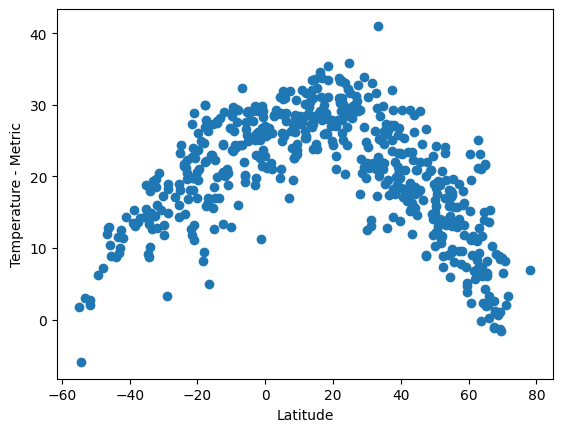

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature - Metric')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude Vs. Cloudiness

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude vs. Wind Speed Plot

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots

def create_linear_regression(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

#print("r-value  : ", rvalue, "\np-value  : ", pvalue, "\nstd-error: ", stderr)

    regress_values = x * slope + intercept
    print(regress_values)

# Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()

# Create line equation string
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

#create_linear_regression(x_values, y_values)

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,haiku-pauwela,20.9219,-156.3051,27.01,74,20,11.32,US,2024-06-07
3,albany,42.6001,-73.9662,15.23,89,74,0.45,US,2024-06-07
5,meadow lake,34.8014,-106.5436,29.82,32,100,5.15,US,2024-06-07
7,severo-yeniseyskiy,60.3725,93.0408,11.43,59,100,4.02,RU,2024-06-07
9,nuuk,64.1835,-51.7216,2.34,100,75,4.12,GL,2024-06-07


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,general roca,-39.0333,-67.5833,13.53,57,100,2.11,AR,2024-06-07
1,daru,-9.0763,143.2092,26.41,87,65,5.92,PG,2024-06-07
4,waitangi,-43.9535,-176.5597,8.79,65,7,3.58,NZ,2024-06-07
6,avarua,-21.2078,-159.7750,24.03,43,54,3.09,CK,2024-06-07
8,adamstown,-25.0660,-130.1015,23.21,78,92,4.34,PN,2024-06-07


###  Temperature vs. Latitude Linear Regression Plot

y = -0.34x + 33.03
City_ID
2      25.974587
3      18.660567
5      21.291775
7      12.664328
9      11.378533
         ...    
559    13.362929
561    12.296134
562    27.770145
563    27.343886
564    20.308180
Name: Lat, Length: 387, dtype: float64


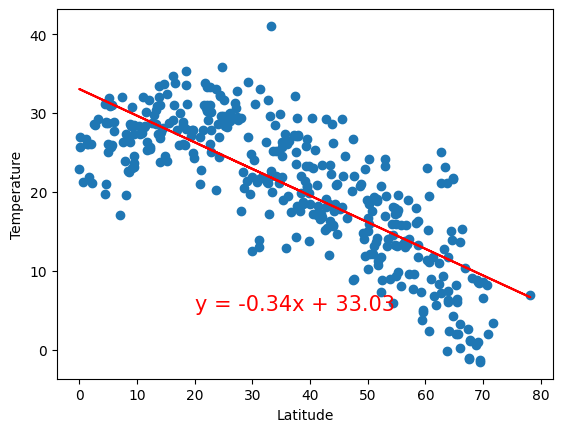

In [30]:
# Linear regression on Northern Hemisphere
nh_x_values = northern_hemi_df['Lat']
nh_y_values = northern_hemi_df['Max Temp']

create_linear_regression(nh_x_values, nh_y_values)

y = 0.39x + 27.29
City_ID
0      12.191600
1      23.778245
4      10.288586
6      19.086074
8      17.593815
         ...    
548    10.807136
549    23.550241
554    23.636376
557     9.457288
560    16.156169
Name: Lat, Length: 178, dtype: float64


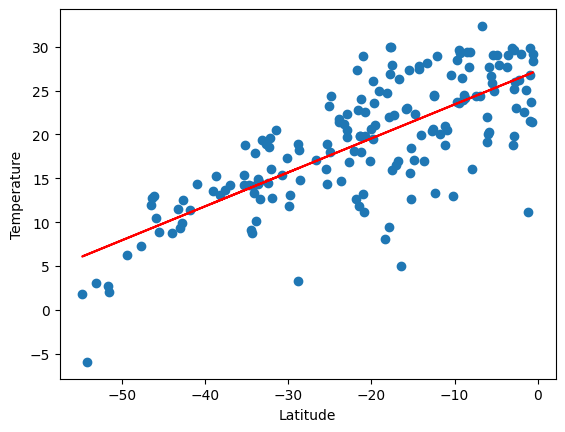

In [31]:
# Linear regression on Southern Hemisphere
sh_x_values = southern_hemi_df['Lat']
sh_y_values = southern_hemi_df['Max Temp']

create_linear_regression(sh_x_values, sh_y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE